In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


from gtda.mapper.filter import Projection,Entropy,Eccentricity
from gtda.mapper.cover import CubicalCover
# scikit-learn method
# giotto-tda method
from gtda.mapper.cluster import FirstSimpleGap
import warnings
warnings.filterwarnings('ignore')
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module='threadpoolctl')
import sys
import os
import textwrap
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
# Redirect stderr to null to suppress the exception messages
sys.stderr = open(os.devnull, 'w')
import ctypes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Suppress low-level warnings from C code
libc = ctypes.CDLL(None)
libc.prctl(15, 0, 0, 0, 0)

-1

In [2]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy

In [3]:
from gtda.diagrams import ForgetDimension
from gtda.homology import EuclideanCechPersistence

In [4]:
df = pd.read_csv("./data/Merged zoo.csv")
X=df.sample(frac=0.1,random_state=42)
params_cols = list(X.columns[17:-2])
X=X[params_cols]
X=X.to_numpy()


In [5]:
X.shape

(3647, 2464)

In [6]:
import umap
umap_model = umap.UMAP(n_components=128)

# Fit and transform
X_umap_3d = umap_model.fit_transform(X)

In [7]:
X_umap_3d.shape

(3647, 128)

In [ ]:
ecp = EuclideanCechPersistence()
X=X_umap_3d.reshape(1,X_umap_3d.shape[0],X_umap_3d.shape[1])
X_ecp = ecp.fit_transform_plot(X)

In [ ]:
# from gtda.graphs import TransitionGraph
# # Random feature matrix

# X=[row.values.reshape(64, -1) for _, row in X.iterrows()]

# #X = np.random.randn(num_samples, num_features,3)
# tg = TransitionGraph(func=lambda x: x)
# X_tg = tg.fit_transform(X)

In [ ]:
#X_tg

In [ ]:
# dense_graphs = np.array([x.toarray() for x in X_tg])
# dense_graphs.shape

In [ ]:
from gtda.graphs import GraphGeodesicDistance

In [ ]:
X_ggd = GraphGeodesicDistance(directed=False).fit_transform(X_tg)
print(X_ggd.shape)


In [ ]:
from gtda.point_clouds import ConsistentRescaling
cr = ConsistentRescaling()

X_rescaled = cr.fit_transform(X)

print(X_rescaled.shape)

In [ ]:
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence
VRP=VietorisRipsPersistence(metric="euclidean").fit_transform(X_ggd)
VietorisRipsPersistence(metric="euclidean").fit_transform_plot(X_ggd)

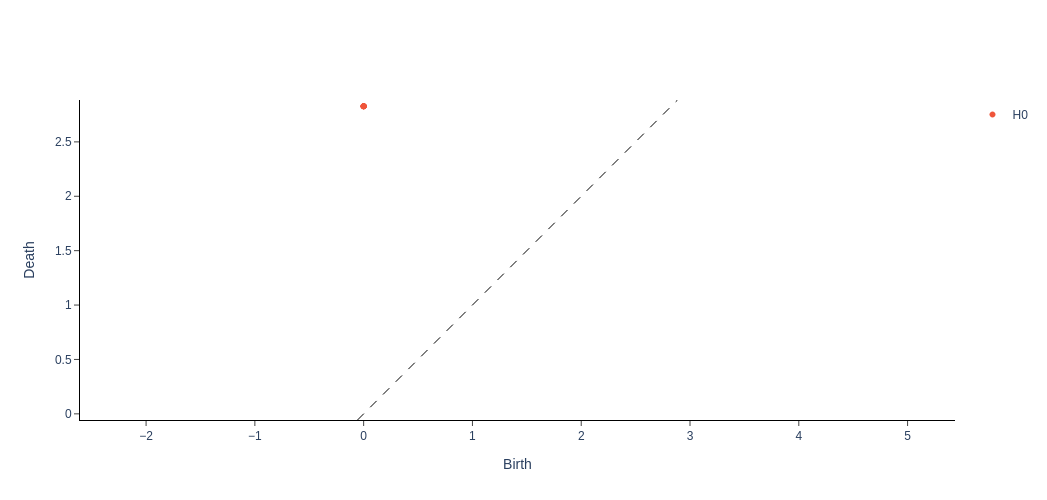

In [43]:
from gtda.diagrams import Filtering
F=Filtering()
filtered_VRP=F.fit_transform_plot(X=VRP)

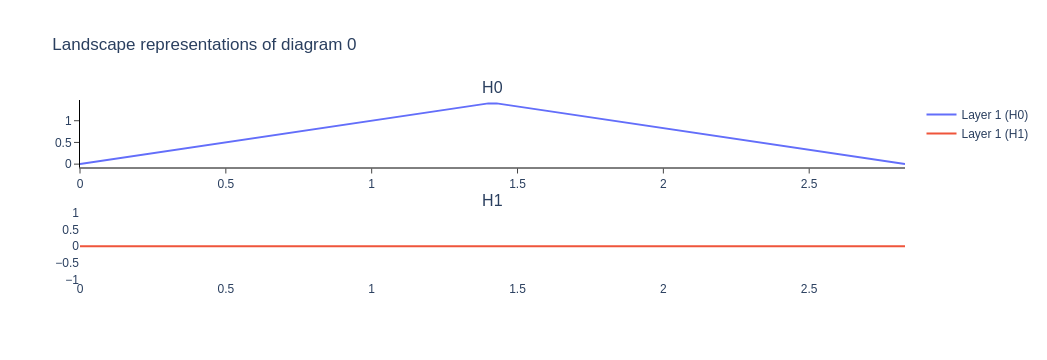

array([[[0.        , 0.02856997, 0.05713994, 0.08570991, 0.11427988,
         0.14284985, 0.17141982, 0.19998979, 0.22855976, 0.25712973,
         0.2856997 , 0.31426968, 0.34283965, 0.37140962, 0.39997959,
         0.42854956, 0.45711953, 0.4856895 , 0.51425947, 0.54282944,
         0.57139941, 0.59996938, 0.62853935, 0.65710932, 0.68567929,
         0.71424926, 0.74281923, 0.7713892 , 0.79995917, 0.82852914,
         0.85709911, 0.88566908, 0.91423905, 0.94280903, 0.971379  ,
         0.99994897, 1.02851894, 1.05708891, 1.08565888, 1.11422885,
         1.14279882, 1.17136879, 1.19993876, 1.22850873, 1.2570787 ,
         1.28564867, 1.31421864, 1.34278861, 1.37135858, 1.39992855,
         1.39992855, 1.37135858, 1.34278861, 1.31421864, 1.28564867,
         1.2570787 , 1.22850873, 1.19993876, 1.17136879, 1.14279882,
         1.11422885, 1.08565888, 1.05708891, 1.02851894, 0.99994897,
         0.971379  , 0.94280903, 0.91423905, 0.88566908, 0.85709911,
         0.82852914, 0.79995917, 0

In [45]:
from gtda.diagrams import PersistenceLandscape
Landscape=PersistenceLandscape()
Landscape.fit_transform_plot(filtered_VRP)

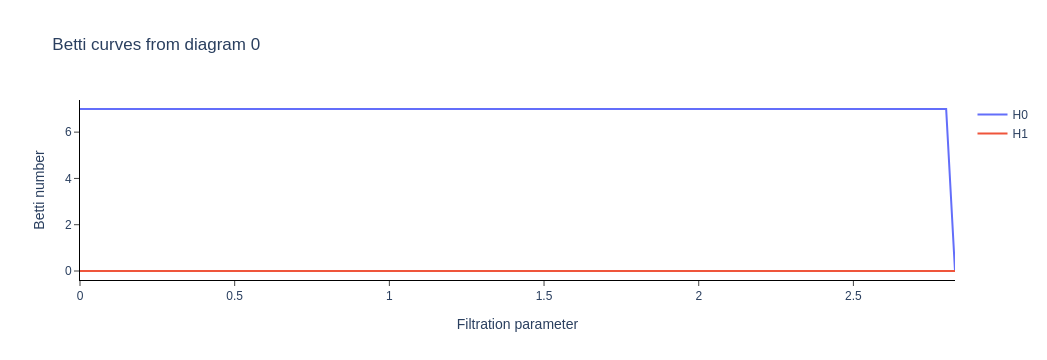

array([[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
         7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [47]:
from gtda.diagrams import BettiCurve
BC=BettiCurve()
BC.fit_transform_plot(filtered_VRP)



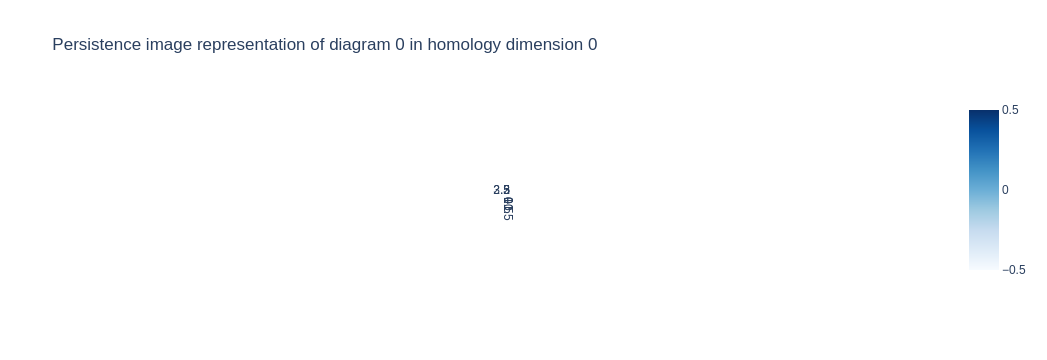

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])

In [49]:
from gtda.diagrams import PersistenceImage
PI=PersistenceImage()
PI.fit_transform_plot(filtered_VRP)